In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as ss
import os

In [3]:
raw_data = sio.loadmat('data/raw/m4000Series_m4028.mat')
sessions = ['m4028_session1', 'm4028_session3', 'm4028_session4', 'm4028_session5']

In [4]:
fs = 2500. 
dt = 1. / fs

for session in sessions:
    print(session)
    print(0)
    file_name = str(session)+'.mat'
    lfp = raw_data[session][0][0][0].flatten()
    run_speed = raw_data[session]['run_speed'][0][0].flatten()
    true_ripples = raw_data[session]['rippleLocs'][0][0].flatten()
    print(0.5)
    candidate_ripples = sio.loadmat(os.path.join('data', 'raw', file_name))['rippleIdx'].flatten()
    duration = sio.loadmat(os.path.join('data', 'raw', file_name))['w'].flatten()
    print(0.75)
    t = np.arange(lfp.shape[0]) * dt
    print(lfp.shape[0])
    # filtering
    b, a = ss.butter(5, Wn=np.array([150, 250]) / (fs/2), btype='bandpass')
    fLFP = ss.filtfilt(b, a, lfp)      
    
    print(1)
    
    # hilbert transform
#     eLFP = abs(ss.hilbert(fLFP))
    
    print(2)
    
    # true_ripples, candidate_ripples
    ripple_true = np.zeros_like(lfp, dtype=int)
    ripple_cand = np.zeros_like(lfp, dtype=int)
    ripple_true[true_ripples] = 1
    ripple_cand[candidate_ripples] = 1
    
    print(3)
    
    df = pd.DataFrame(np.c_[t, lfp, fLFP, ripple_true, ripple_cand, run_speed], 
                  columns=['time', 'LFP', 'fLFP', 'ripple_true', 'ripple_cand', 'speed'])
    
    print(4)
    
    save_path = os.path.join('data', 'processed', str(session)+'pkl')
    df.to_pickle(save_path)
    print()

m4028_session1
0
0.5
0.75
1507795
1
2
3
4

m4028_session3
0
0.5
0.75
1507737
1
2
3
4

m4028_session4
0
0.5
0.75
1507826
1
2
3
4

m4028_session5
0
0.5
0.75
1507793
1
2
3
4



In [5]:
lfp = raw_data['m4028_session1'][0][0][0].flatten()
run_speed = raw_data['m4028_session1']['run_speed'][0][0].flatten()
true_ripples = raw_data['m4028_session1']['rippleLocs'][0][0].flatten()

candidate_ripples = sio.loadmat('data/raw/m4028_session1.mat')['rippleIdx'].flatten()
duration = sio.loadmat('data/raw/m4028_session1.mat')['w'].flatten()

In [6]:
lfp.shape, run_speed.shape, true_ripples.shape

((1507795,), (1507795,), (113,))

In [7]:
fs = 2500. 
dt = 1. / fs
t = np.arange(lfp.shape[0]) * dt

<IPython.core.display.Javascript object>


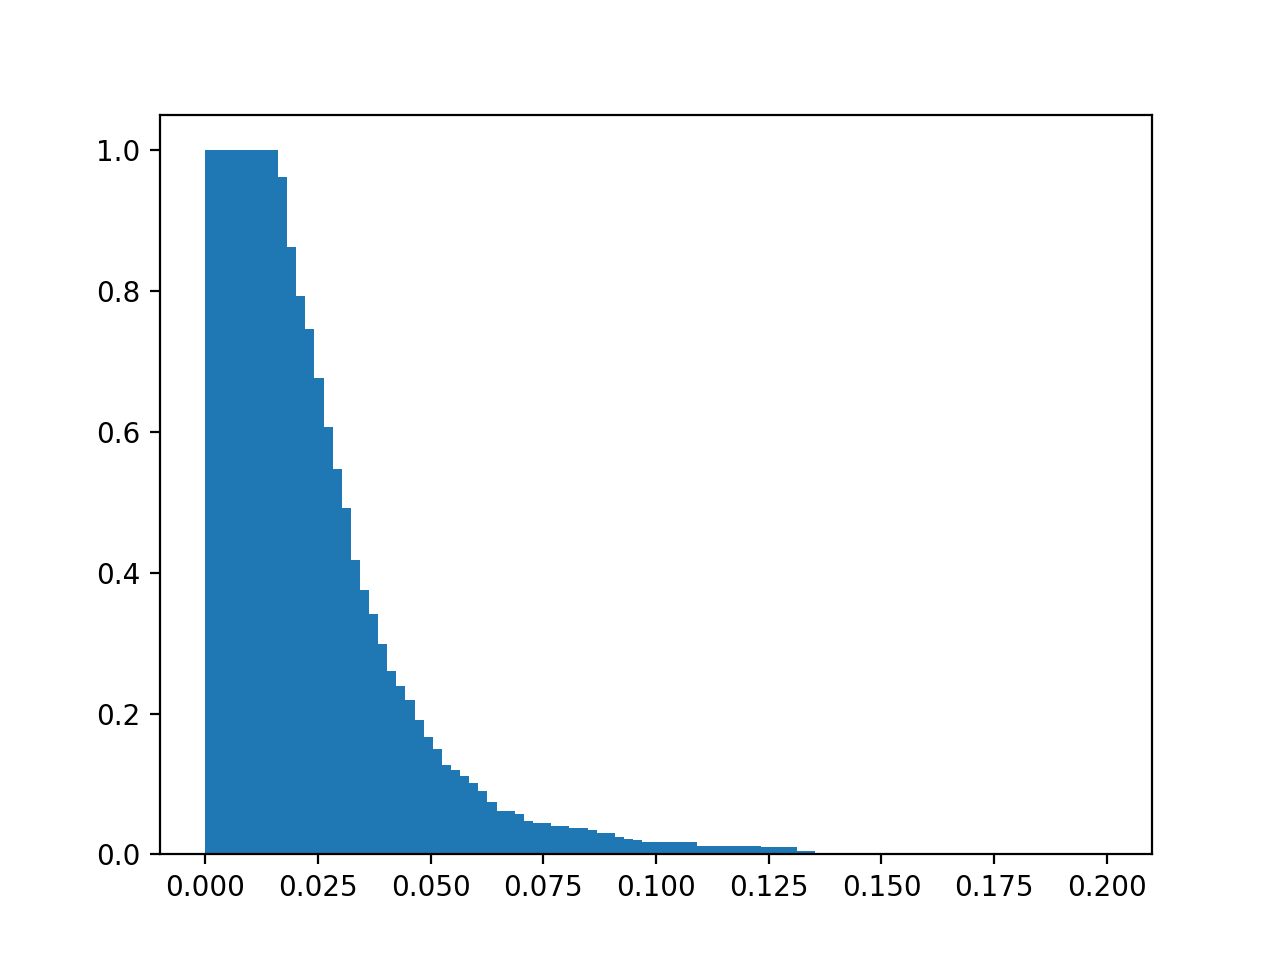

In [8]:
plt.figure()
plt.hist(duration, bins=np.linspace(0, 2.e-1, 100), cumulative=-1, density=True)
plt.show()

In [9]:
0.075*2500

187.5

In [10]:
# filtering
b, a = ss.butter(5, Wn=np.array([150, 250]) / (fs/2), btype='bandpass')
fLFP = ss.filtfilt(b, a, lfp)                 

In [11]:
# hilbert transform
eLFP = abs(ss.hilbert(fLFP))

In [12]:
# true_ripples, candidate_ripples
ripple_true = np.zeros_like(lfp, dtype=int)
ripple_cand = np.zeros_like(lfp, dtype=int)

ripple_true[true_ripples] = 1
ripple_cand[candidate_ripples] = 1

In [13]:
df = pd.DataFrame(np.c_[t, lfp, fLFP, eLFP, run_speed, ripple_true, ripple_cand], 
                  columns=['time', 'LFP', 'fLFP', 'eLFP', 'speed', 'ripple_true', 'ripple_cand'])

In [14]:
df.to_pickle('data/processed/data.pkl')

<IPython.core.display.Javascript object>


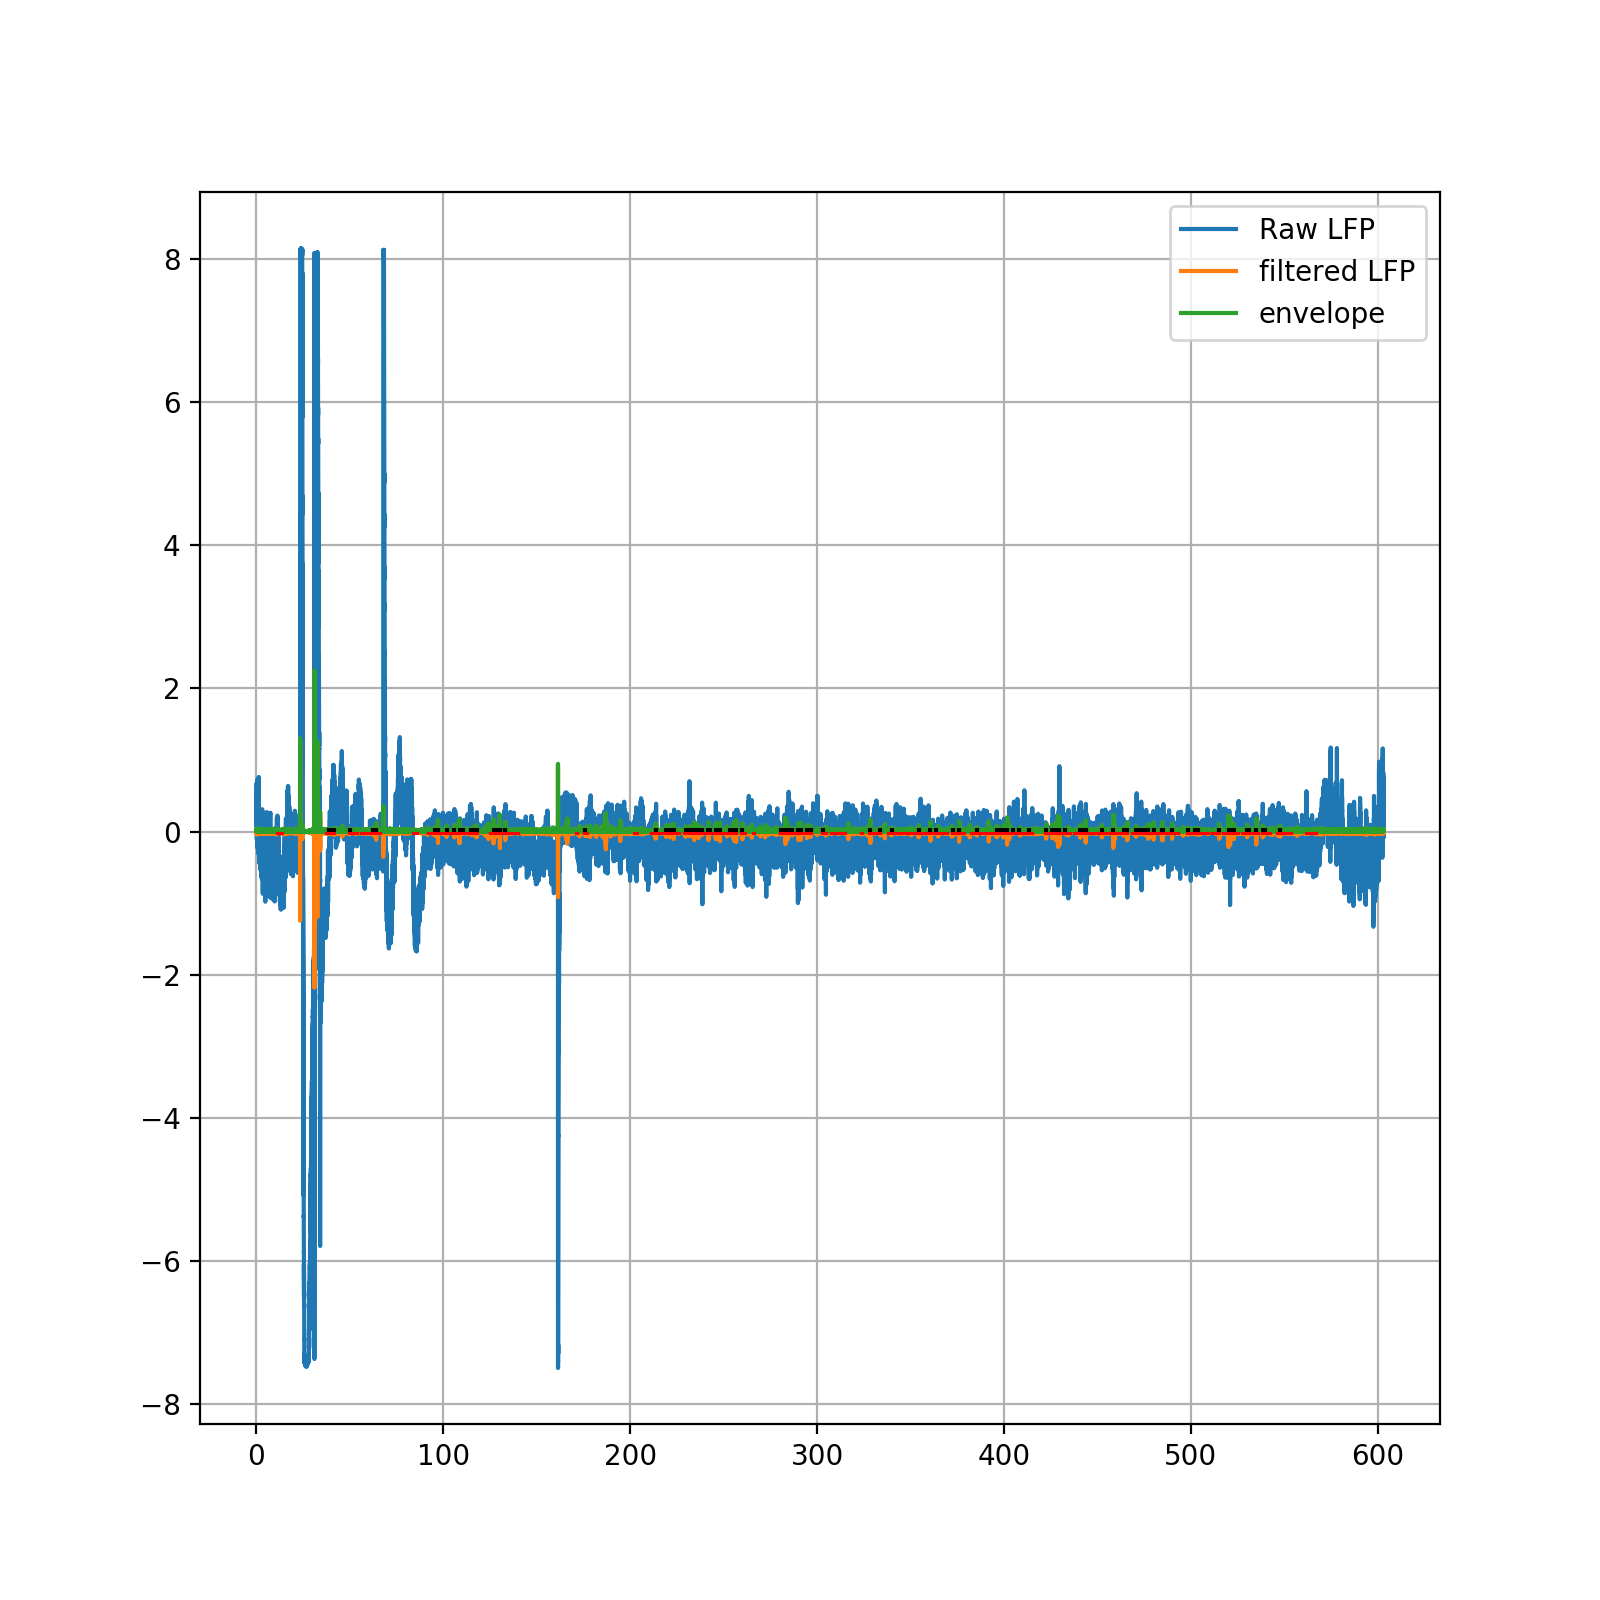

In [15]:
plt.figure(figsize=(8, 8))
plt.plot(t, lfp, label='Raw LFP')
plt.plot(t, fLFP, label='filtered LFP')
plt.plot(t, eLFP, label='envelope')


#plt.plot(t, run_speed, label='running speed')

plt.vlines(t[true_ripples], 
           np.zeros(t[true_ripples].size), np.zeros(t[true_ripples].size)+0.05, 
           'k', zorder=10)
plt.vlines(t[candidate_ripples], 
           np.zeros(t[candidate_ripples].size)-0.05, np.zeros(t[candidate_ripples].size), 
           'r', zorder=10)
plt.grid()

#for i in range(true_ripples.shape[0]):
#    plt.scatter(x=t[true_ripples[i]], color='black')
#for i in range(true_ripples.shape[0]):
#    plt.axvline(x=t[true_ripples[i]], color='black')
plt.legend()
plt.show()

In [16]:
plt.vlines

<function matplotlib.pyplot.vlines(x, ymin, ymax, colors='k', linestyles='solid', label='', *, data=None, **kwargs)>

In [17]:
# fS, tS, Sxx = signal.spectrogram(lfp[(t>=100) & (t <200)], fs, nfft=256, noverlap=250)

In [18]:
# plt.figure()
# plt.pcolormesh(tS, fS[fS>=10], np.log(Sxx[fS>=10, ]))
# plt.plot(t[true_ripples], np.zeros(t[true_ripples].size)+200, 'w|')
# plt.xlim(tS.min(), tS.max())
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.show()